<a href="https://colab.research.google.com/github/himanshivarma/LGM/blob/main/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HIMANSHI VARMA
DATA SCIENCE INTERN _ LGMVIP
Intermediate Level - Task 4: Prediction Using Decision Tree

In [ ]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data = pd.read_csv(r'/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


DATA EXPLORATION

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
target = data['Species']
data_pp = data.copy()
data_pp = data_pp.drop('Species', axis=1)
data.shape

(150, 6)

In [ ]:
X = data.iloc[:, [0,1,2,3]].values
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])
y = data['Species'].values
data.shape

(150, 6)

# TRAINING OF DATA SET AND TESTING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("Train split:",X_train.shape)
print("Test split:",X_test.shape)

Train split: (120, 4)
Test split: (30, 4)


# DEFINING AND INITIALIZATION OF DATA **TREE**

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Creation of descision tree is successfull!")

Creation of descision tree is successfull!


# REPORT OF CLASSIFICATION

In [ ]:
y_pred = dtree.predict(X_test)

print("Classification report:\n\n",classification_report(y_test,y_pred))

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# CONFUSION MATRIX

In [ ]:
cfmatrix = confusion_matrix(y_test,y_pred)
print(cfmatrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# CALCULATION OF ACCURACY

In [ ]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred)*100,"%")

Accuracy: 100.0 %


# VISUALIZATION OF DESCISION TREE FOR IRIS FLOWER DATASET

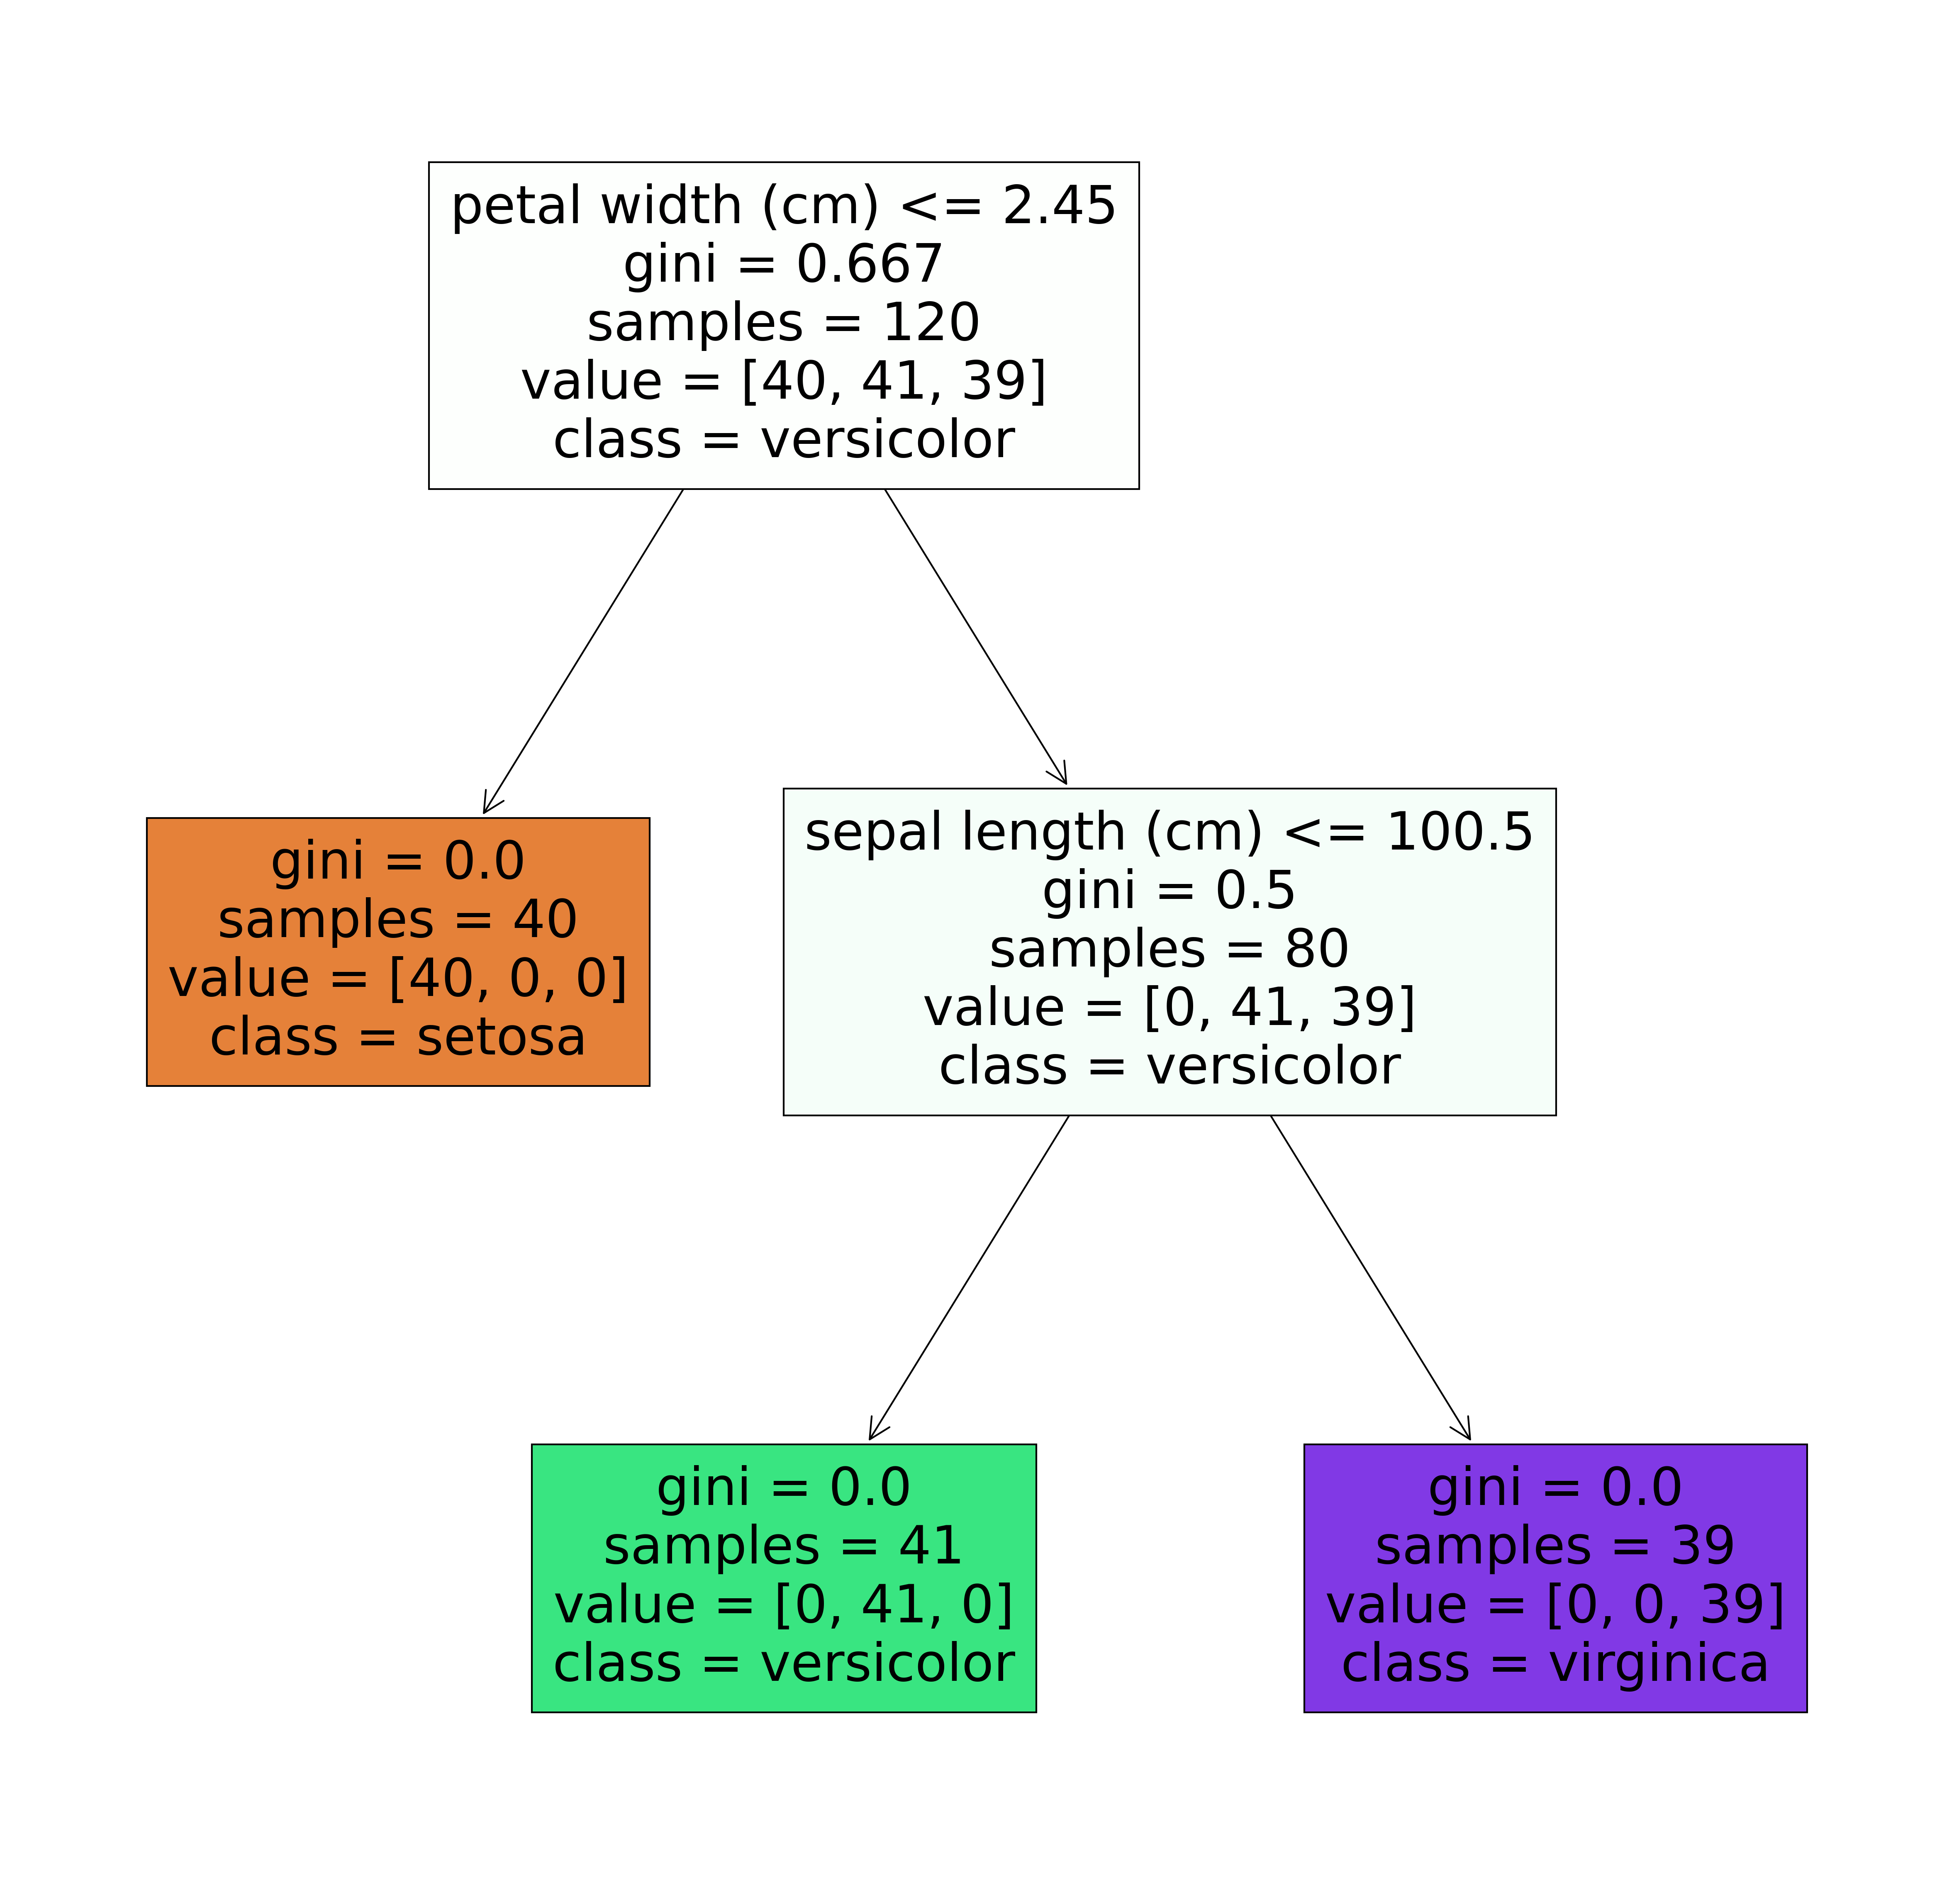

In [ ]:
from sklearn import tree

characteristics = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
species = ['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi = 300)

tree.plot_tree(dtree, feature_names = characteristics, class_names = species, filled = True);

fig.savefig('Visualized_Tree.png')